 # Trabajo Práctico de Simulación N°1

## 1. Estacionariedad y ergodicidad

### A. Visualización

In [93]:
#Importar librerias
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats
from scipy.signal import correlate
from scipy.signal import periodogram
#Librerias interactivas
from ipywidgets import interact,fixed
import ipywidgets as widgets

In [2]:
#Importar datos a partir de un archivo .csv exportado desde Scilab 
rp1dat = np.genfromtxt('rp1', delimiter=',');
rp2dat = np.genfromtxt('rp2', delimiter=',');
rp3dat = np.genfromtxt('rp3', delimiter=',');
data = [rp1dat,rp2dat,rp3dat];

In [3]:
# M realiziciones, N tiempos / Valores maximos M=N=1000
#RP_j [1,2,3]
def rp(j,M,N):
    t = np.arange(1,N+1);
    for i in range(M):
        plt.plot(t,data[j-1][i,:N],'-');
    plt.title("RP"+str(j))
    plt.xlabel("N")
    plt.ylabel("Amplitud de señal")
    plt.show()

In [4]:
#Visualizar
interact(rp,
        j=[('RP1',1),('RP2',2),('RP3',3)],
        M = widgets.IntSlider(value=5, min=1, max=13),
        N = widgets.IntSlider(value=100, min=1, max=1000));

interactive(children=(Dropdown(description='j', options=(('RP1', 1), ('RP2', 2), ('RP3', 3)), value=1), IntSli…

### B. A priori

**Estacionariedad en sentido amplio (WSS)**
* $E[X(t)]=m_X$ (independiente del tiempo)
* $R_X(t_1,t_2)=R_X(\tau)$ con $\tau=t_2-t_1$

**Teorema de Ergocidad para la media**

El proceso $X(t)$ WSS con media $m_X(t)=m$ es ergódico en media si:
    $$\lim_{T \to \infty} \left< X(t)\right>_T = m$$

**Teorema de Ergodicidad para la Autocorrelación**

El proceso $X(t)$ con autocorrelación $R_X(\tau)$ es ergódico si:
     $$\lim_{T \to \infty} \left< X(t)X(t+\tau)\right>_T = R_X(\tau)$$

### C. A Posteriori

In [5]:
#Obtener medias y variancias:
# M realizaciones hasta tiempo T del los datos j
def var_aleatorias(data,j,M,T):
    Mx = []
    Vx = []
    for i in range(T):
        Mx.append(st.mean(data[j-1][:M,i])); 
        Vx.append(st.variance(data[j-1][:M,i]));
    return Mx,Vx
#Plotear dichos resultados
def vaplot(data,j,M,T):
    Mx,Vx = var_aleatorias(data,j,M,T)
    plt.title("RP"+str(j))
    plt.xlabel("N")
    plt.ylabel("Amplitud de señal")
    plt.plot(np.arange(T),Mx, "or", label="Media con "+str(M)+" realizaciones")
    plt.plot(np.arange(T),Vx, "hb", label="Variancia con "+str(M)+" realizaciones")
    plt.legend(loc="upper left")
    plt.show()

In [6]:
interact(vaplot,
        data = fixed(data),
        j=[('RP1',1),('RP2',2),('RP3',3)],
        M = widgets.IntSlider(value=5, min=1, max=1000),
        T = widgets.IntSlider(value=100, min=1, max=1000));

interactive(children=(Dropdown(description='j', options=(('RP1', 1), ('RP2', 2), ('RP3', 3)), value=1), IntSli…

In [7]:
#Autocovariancia por definicion
def autocov(data,j,t1,t2):
    X1 = data[j-1][:,t1]; #VA muestras en t1
    X2 = data[j-1][:,t2]; #VA muestras en t2
    n = len(X1);
    m1=st.mean(X1); #Media en t1
    m2=st.mean(X2); #Media en t2
    z = st.mean((X1-m1)*(X2-m2)); #Autocovariancia
    return z

In [8]:
def ACplot(data,j,N):
    xv = np.arange(N)
    yv = np.arange(N)
    zv = np.zeros((len(xv), len(yv)))
    for i, x in enumerate(xv):
      for k, y in enumerate(yv):
        zv[i,k] = autocov(data,j,x,y)
    plt.pcolormesh(xv,yv,zv,shading='auto')
    plt.colorbar()
    plt.xlabel('t1')
    plt.ylabel('t2')
    plt.title('Autocovariancia')
    plt.show()

In [9]:
interact(ACplot,
        data = fixed(data),
        j=[('RP1',1),('RP2',2),('RP3',3)],
        N = widgets.IntSlider(value=5, min=1, max=30));

interactive(children=(Dropdown(description='j', options=(('RP1', 1), ('RP2', 2), ('RP3', 3)), value=1), IntSli…

In [10]:
#Definir la autocorrelación para la realizacion M
def xcorr(data,j,M):
    s = data[j-1][M,:]; #señal
    rx = correlate(s,s,method='fft');
    return rx
#Plotear
def xcplt(data,j,M):
    rx = xcorr(data,j,M)
    plt.title("RP"+str(j)+" Autocorrelacion")
    plt.xlabel("K")
    plt.ylabel("Amplitud")
    plt.plot(np.arange(1999),rx, ".b", label="Realizacion "+str(M))
    plt.legend(loc="upper left")
    plt.show()

In [11]:
interact(xcplt,
        data = fixed(data),
        j=[('RP1',1),('RP2',2),('RP3',3)],
        M = widgets.IntSlider(value=5, min=1, max=1000));

interactive(children=(Dropdown(description='j', options=(('RP1', 1), ('RP2', 2), ('RP3', 3)), value=1), IntSli…

### D. Promedios temporales

In [12]:
#Calcular promedio temporal para cada realizacion
def tmean(data,j,M):
    Tm = st.mean(data[j-1][M,:])
    return Tm
#Plotear
def tmplt(data,j):
    TM = []
    for M in np.arange(1000):
        TM.append(tmean(data,j,M))
    plt.title("RP"+str(j)+" Promedio temporal")
    plt.xlabel("Realizacion")
    plt.ylabel("Promedio temporal")
    plt.plot(np.arange(1000),TM, ".g")
    plt.show()

In [13]:
interact(tmplt,
        data = fixed(data),
        j=[('RP1',1),('RP2',2),('RP3',3)]);

interactive(children=(Dropdown(description='j', options=(('RP1', 1), ('RP2', 2), ('RP3', 3)), value=1), Output…

## 2. Gaussian White Noise–The building block of parametric modeling

## 3. First–Order Autoregressive Processes Generation–An important building block 

Sea el proceso auto-regresivo de primer orden dado por:

$X[n]=aX[n-1]+W[n]$

Donde $W[n]$ es un ruido blanco gaussiano y $a$ es el componente autoregresivo

In [39]:
#Generar el proceso para un dado a
def autoreg(a,N):
    X = np.zeros(N);
    for n in np.arange(1,N):
        X[n] = a * X[n-1] + W[n]
    return X
#Ruido
N = 1000;
W = np.random.normal(loc=0, scale=1.0, size=N);

def arplt(a,N):
    X=autoreg(a,N)
    plt.title("Proceso auto-regresivo")
    plt.xlabel("n")
    plt.ylabel("Amplitud")
    plt.plot(np.arange(N),X,".r",label='Autorregresión')
    plt.plot(np.arange(N),W,'.b',label='Ruido Blanco Gaussiano')
    plt.legend()
    plt.show()

In [42]:
interact(arplt,
        a = widgets.FloatSlider(value=0.1, min=0.01, max=0.99, step=0.01),
        N = fixed(N));

interactive(children=(FloatSlider(value=0.1, description='a', max=0.99, min=0.01, step=0.01), Output()), _dom_…

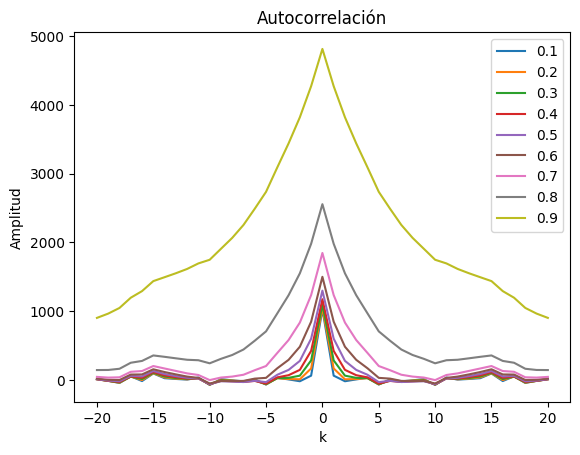

In [91]:
for i in np.arange(0.1,1,0.1):
    val = autoreg(i,N)
    rxc = correlate(val,val)
    k = np.arange(-20,21)
    plt.title("Autocorrelación")
    plt.xlabel("k")
    plt.ylabel("Amplitud")
    plt.plot(k,rxc[979:1020],label=str("{:.1f}".format(i)))
    plt.legend()

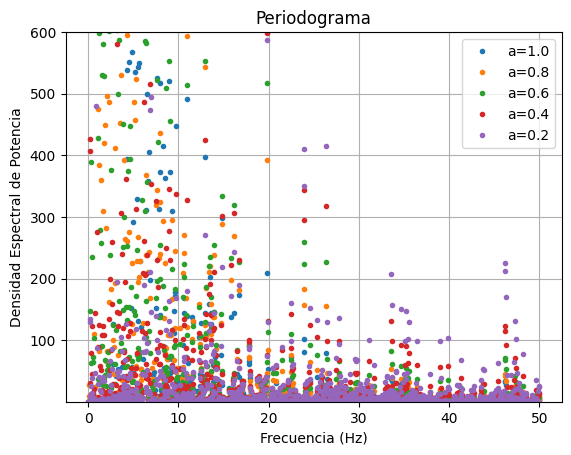

In [143]:
#PSD para distintos valores de a
for i in np.arange(1,0,-0.2):
    val = autoreg(i,N)
    rxc = correlate(val,val)
    f,psd=periodogram(rxc,fs=100)
    plt.plot(f,psd,'.',label="a="+str("{:.1f}".format(i)))
    plt.legend()
    plt.title('Periodograma')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad Espectral de Potencia')
    plt.ylim(1e-3,600)
    plt.grid()

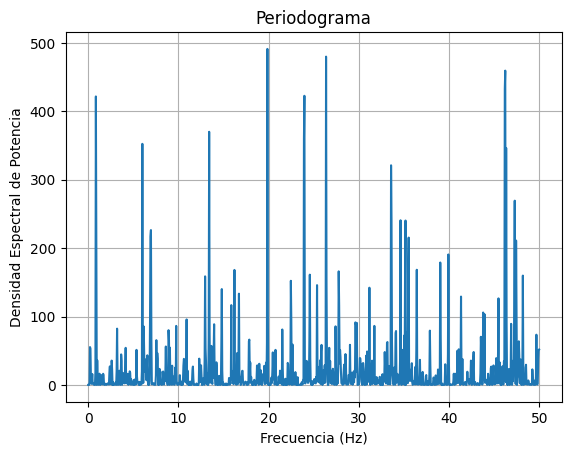

In [149]:
#Para un a fijo
val = autoreg(0,N)
rxc = correlate(val,val)
f,psd=periodogram(rxc,fs=100)
plt.plot(f,psd)
plt.title('Periodograma')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.grid()